# Insurance Cost Prediction

## Goal

We want to construct a linear regression predictor to predict the total cost of an insurance bill

## About the data

We will be using the [Medical Cost Data Set](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) from Kaggle.

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,

**objective** index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

## Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Model development

### Load data

In [3]:
insurance = pd.read_csv('data/insurance.csv')

### EDA

In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Observations

- We have 1300+ observations
- We have 6 features to try to predict 'charges'
- We don't have missing data
- Age looks uniformly distributed with a range of [18 , 64]
- As for sex we have almost a 50/50 split
- BMI looks normally distributed with some right skewness 
- On average people have 1 dependant, about 50% of the people doesn't have one
- 80% are non-smokers
- the region is evenly distributed between the 4
- charges goes from as little as 1121 up to 63770

### Feature engineering I

Let's perform some cleaning on the features

In [7]:
insurance['sex'] = insurance['sex'].apply(lambda row: 1 if row == 'female' else 0)

In [8]:
insurance['bmi'] = insurance['bmi'].round(0).astype(int)

In [9]:
insurance['smoker'] = insurance['smoker'].apply(lambda row: 1 if row == 'yes' else 0)

In [10]:
insurance['charges'] = insurance['charges'].round(0).astype(int)

- Coded sex and smoker into 1 or 0
- bmi and charges where rounded and casted as integers

### Correlations

Let's find out if there are features that can be helpful to predict 'charges'

In [11]:
numerical_feats = insurance.select_dtypes(include=['number']).columns
insurance[numerical_feats].corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299009
bmi         0.198795
children    0.067997
sex        -0.057291
Name: charges, dtype: float64

- Smoker and Age looks strongly correlated
  - Smoking can cause a plethora of health problems so that the total cost increases if they are smokers is quite spected
  - As we age we start to get more health problems thus incurring in extra costs

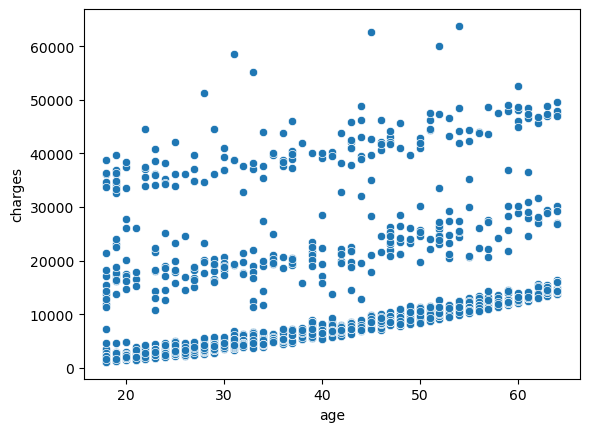

In [12]:
# create a scatter plot
sns.scatterplot(x=insurance['age'], y=insurance['charges'])
plt.show()

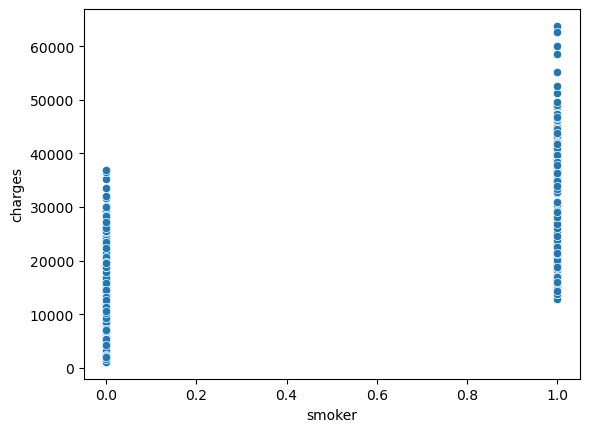

In [13]:
sns.scatterplot(x=insurance['smoker'], y=insurance['charges'])
plt.show()

Now lets check the categorical features

In [14]:
categorical_feats = insurance.select_dtypes(include=['object']).columns
categorical_feats

Index(['region'], dtype='object')

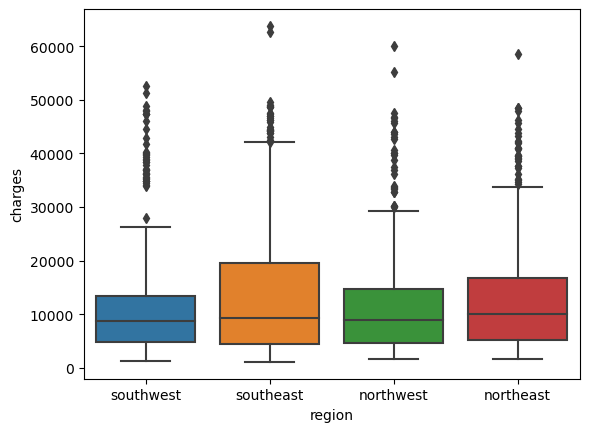

In [15]:
sns.boxplot(x=insurance['region'], y=insurance['charges'])
plt.show()

They don't look really correlated although southeast has a bigger spread

#### Conclusions

We will select sex and smoker for our model as features to use to predict the total cost

### Datasets preparation

In [16]:
X = insurance[['age', 'smoker']]
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

### Fitting the data

In [17]:
lr = LinearRegression()

lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_train)

### Evaluating the model

In [18]:
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_train, y_pred)


print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


MSE: 41472221.13
RMSE: 6439.89
R2: 0.71


We've been able to explain only 71% of the variance for the training data, which not bad but not so good.

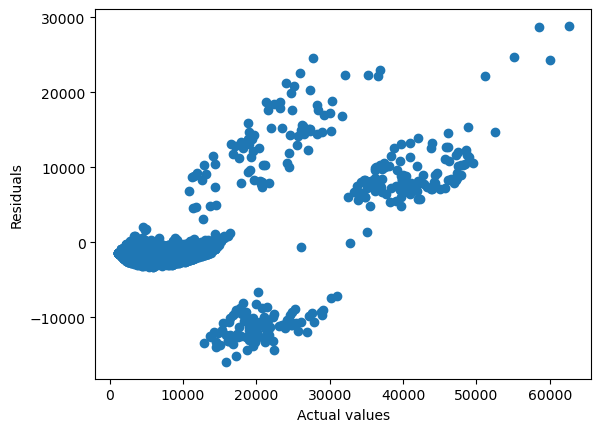

In [19]:
residuals = y_train - y_pred
plt.scatter(y_train, residuals)
plt.xlabel("Actual values")
plt.ylabel("Residuals")
plt.show()

- The scatter plot show not a random pattern. The model is not a good fit for our data, the relationship could be non-linear
- The residuals look like uptrending, polynomial trend

Based on the previous our model has low chances to perform well on the test data. Let's see.

### Final model evaluation

In [20]:
# make predictions
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MSE: 38274474.58
RMSE: 6186.64
R2: 0.75


The model perform better on the test data.

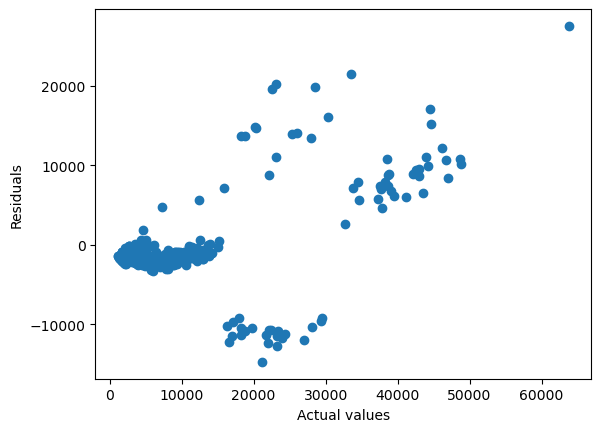

In [22]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual values")
plt.ylabel("Residuals")
plt.show()

Same here, the residuals show that there is no linear relationship

### Conclusions

- This model won't be useful in a real case scenario for an Insurance company.
- We would need to explore alternatives like:
  - Feature engineering to consider the effects of 2 variables, use polynomials
  - Use another ML model
